<a href="https://colab.research.google.com/github/leonbenenati/leon_Lighthouse_2023/blob/main/Lighthouse_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carregando pacotes iniciais

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

In [ ]:
df = pd.read_csv("/content/desafio_manutencao_preditiva_treino.csv")
df.head()

,udi,product_id,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure
3,6,M14865,M,298.1,308.6,1425,41.9,11,No Failure
4,7,L47186,L,298.1,308.6,1558,42.4,14,No Failure


In [ ]:
df.shape

(6667, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   udi                    6667 non-null   int64  
 1   product_id             6667 non-null   object 
 2   type                   6667 non-null   object 
 3   air_temperature_k      6667 non-null   float64
 4   process_temperature_k  6667 non-null   float64
 5   rotational_speed_rpm   6667 non-null   int64  
 6   torque_nm              6667 non-null   float64
 7   tool_wear_min          6667 non-null   int64  
 8   failure_type           6667 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

udi                      0
product_id               0
type                     0
air_temperature_k        0
process_temperature_k    0
rotational_speed_rpm     0
torque_nm                0
tool_wear_min            0
failure_type             0
dtype: int64

Não há valores faltantes

Verificar valores únicos de cada coluna

In [ ]:
for column in df.columns:
  print(f'{column} possui {df[column].nunique()} valores unicos')
  print('------------------------------------------------------')

udi possui 6667 valores unicos
------------------------------------------------------
product_id possui 6667 valores unicos
------------------------------------------------------
type possui 3 valores unicos
------------------------------------------------------
air_temperature_k possui 93 valores unicos
------------------------------------------------------
process_temperature_k possui 82 valores unicos
------------------------------------------------------
rotational_speed_rpm possui 840 valores unicos
------------------------------------------------------
torque_nm possui 547 valores unicos
------------------------------------------------------
tool_wear_min possui 243 valores unicos
------------------------------------------------------
failure_type possui 6 valores unicos
------------------------------------------------------


# EDA

Na EDA as váriaveis serão analisadas separadamente e em relação a variável de interesse que é failure_type

Para as variáveis categóricas irá ser utilizados graficos de barras

As variáveis númericas serão mostrada em histogramas

Para failure_type será utilizado gráfico de barras para verificar o balanceamento de classes

Por ultimo uma correlação das variáveis será feita

## Tipos de falhas

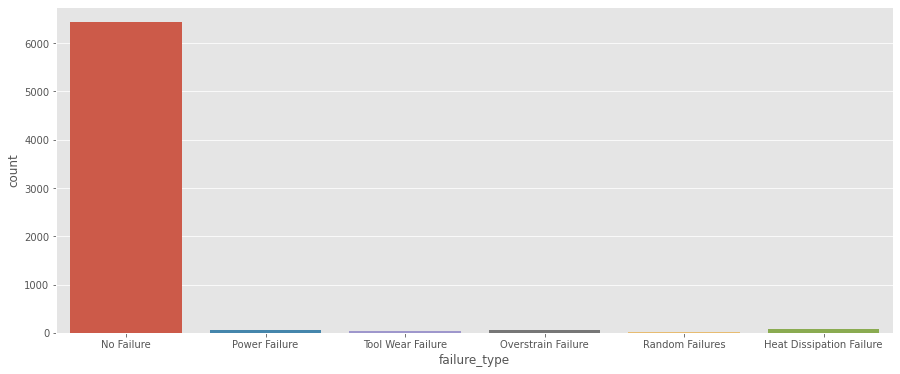

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["failure_type"])

In [ ]:
dist = df['failure_type'].value_counts(normalize = True)
print(dist)

No Failure                  0.965202
Heat Dissipation Failure    0.011249
Power Failure               0.009450
Overstrain Failure          0.007800
Tool Wear Failure           0.004500
Random Failures             0.001800
Name: failure_type, dtype: float64



*   Sem falhas representa mais de 96% da base
*   Menos de 4% da base apresenta falhas por 5 diferentes causas
*   Os dados estão desbalanceados, como esperado tem muito mais máquinas que não falham do que falham

## tipos de equipamento

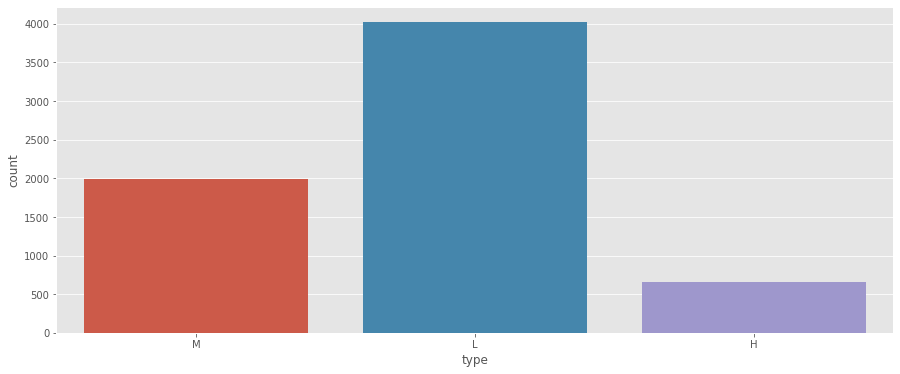

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x=df["type"])

In [ ]:
dist = df['type'].value_counts(normalize = True)
print(dist)

L    0.603270
M    0.298035
H    0.098695
Name: type, dtype: float64




*   60% de produtos do tipo Low, 29% do tipo médio e menos de 10% do tipo alto

In [ ]:
#Dividendo o dataset nos 3 tipos de qualidade das máquinas
low=df.loc[df["type"] == "L"]
med=df.loc[df["type"] == "M"]
hig=df.loc[df["type"] == "H"]

In [ ]:
distl = low['failure_type'].value_counts(normalize = True)
print(distl)

No Failure                  0.959970
Overstrain Failure          0.012432
Heat Dissipation Failure    0.011437
Power Failure               0.009697
Tool Wear Failure           0.004724
Random Failures             0.001740
Name: failure_type, dtype: float64


In [ ]:
distm = med['failure_type'].value_counts(normalize = True)
print(distm)

No Failure                  0.972823
Heat Dissipation Failure    0.011072
Power Failure               0.010065
Tool Wear Failure           0.005033
Random Failures             0.000503
Overstrain Failure          0.000503
Name: failure_type, dtype: float64


In [ ]:
disth = hig['failure_type'].value_counts(normalize = True)
print(disth)

No Failure                  0.974164
Heat Dissipation Failure    0.010638
Power Failure               0.006079
Random Failures             0.006079
Overstrain Failure          0.001520
Tool Wear Failure           0.001520
Name: failure_type, dtype: float64


*   Sem falhas do baixo é quase 96%.
*   Do médio e alta qualidade passa ods 97%, sendo alta um pouco maior
*   Como esperado, qualidade interfere nas falhas

## Temperatura do ar em Kelvin

In [ ]:
df["air_temperature_k"].describe()

count    6667.000000
mean      299.992515
std         1.994710
min       295.300000
25%       298.300000
50%       300.000000
75%       301.500000
max       304.500000
Name: air_temperature_k, dtype: float64

*   A váriavel temperatura do ar foi previamennte normalizada em torno de 300 kelvin com desvio padrão de 2 kelvin

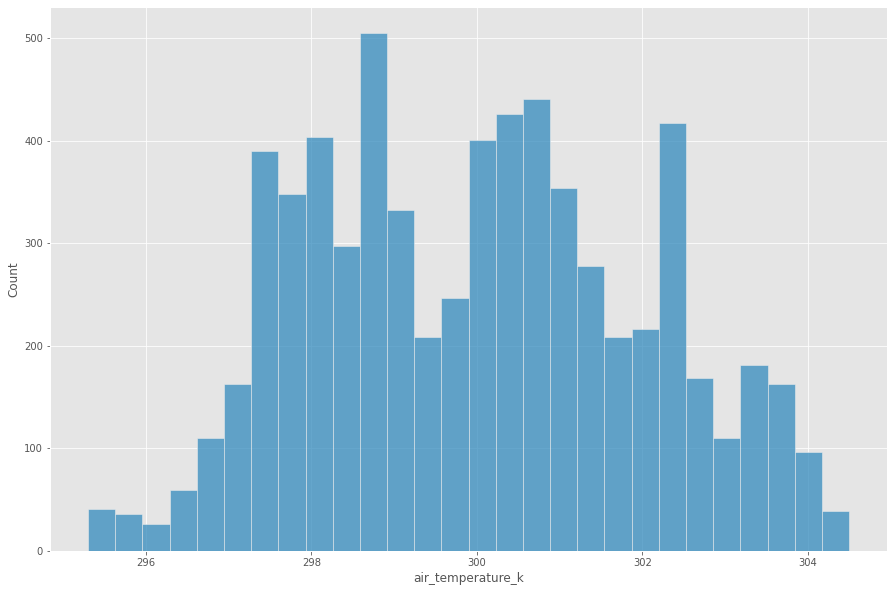

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x=df["air_temperature_k"])

*   A média está em torno de 300 kelvin que da em torno de 27 graus celsius

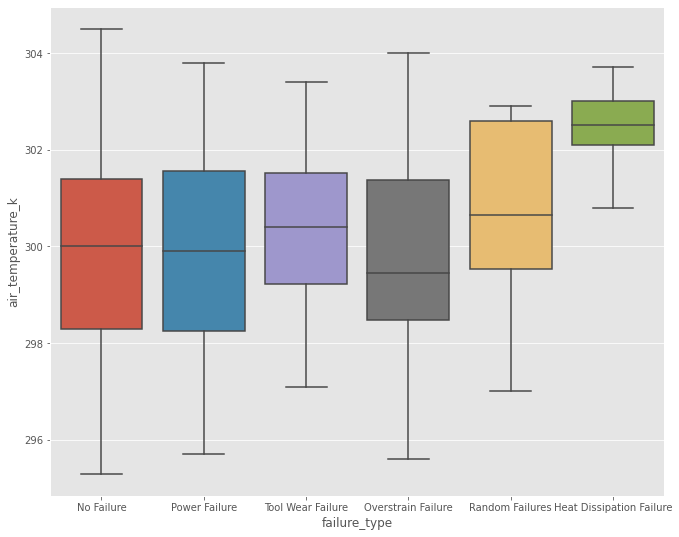

In [ ]:
# Temperatura ambiente por tipo de falha 
plt.figure(figsize = (11,9))
sns.boxplot(x=df["failure_type"],y=df['air_temperature_k'])

*   O boxplot de falha de energia tem certa semelhança com não falha, os outros tipos de falhas são bem diferentes

## Temperatuda do processo em Kelvin

In [ ]:
df["process_temperature_k"].describe()

count    6667.000000
mean      309.992620
std         1.488101
min       305.700000
25%       308.800000
50%       310.000000
75%       311.100000
max       313.800000
Name: process_temperature_k, dtype: float64

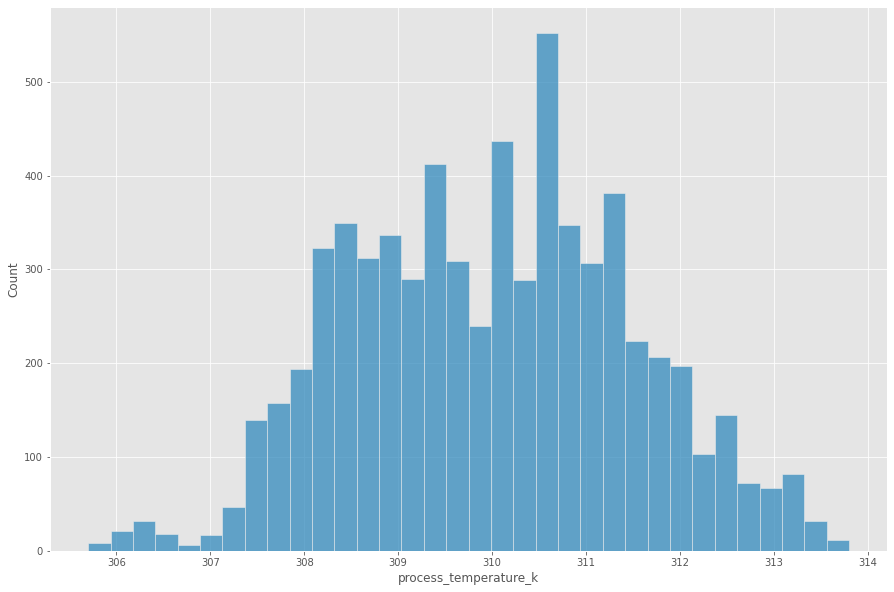

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(x=df["process_temperature_k"])

*   A média de temperatura do processo está 10 kelvins a mais do que a tempratura do ar.
*   A média está em torno de 310 kelvin que da em torno de 37 graus celsius

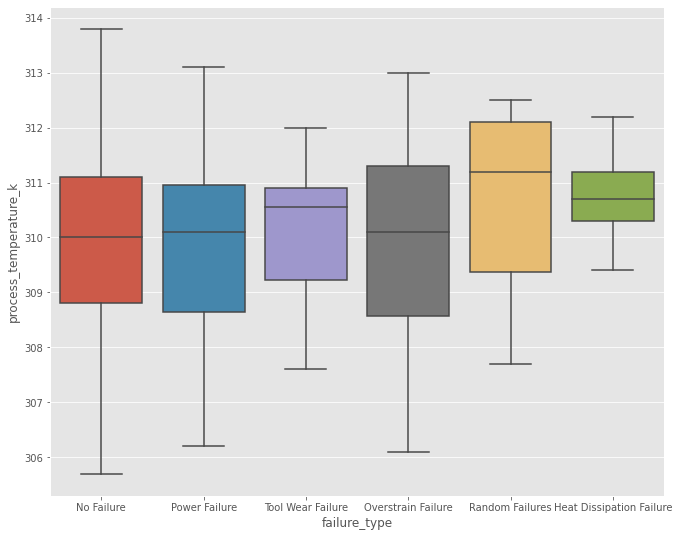

In [ ]:
# Temperatura do processo por tipo de falha 
plt.figure(figsize = (11,9))
sns.boxplot(x=df["failure_type"],y=df['process_temperature_k'])

*   O boxplot de falha de energia tem certa semelhança com não falha, os outros tipos de falhas são bem diferentes 

## Velocidade de rotação em RPM

In [ ]:
df["rotational_speed_rpm"].describe()

count    6667.000000
mean     1537.419529
std       177.182908
min      1168.000000
25%      1422.500000
50%      1503.000000
75%      1612.000000
max      2886.000000
Name: rotational_speed_rpm, dtype: float64

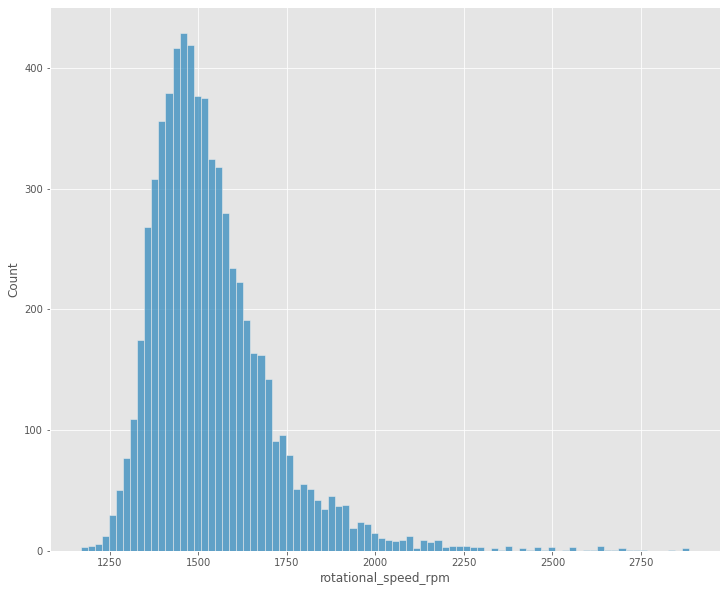

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(x=df["rotational_speed_rpm"])

*   A média de rotação é de 1537
*   Desvio padrão é 177
*   Valor mínimo 1168. Valor máximo 2886
*   Q1: 1422,5. Q3:1612
*   Apresenta outlers

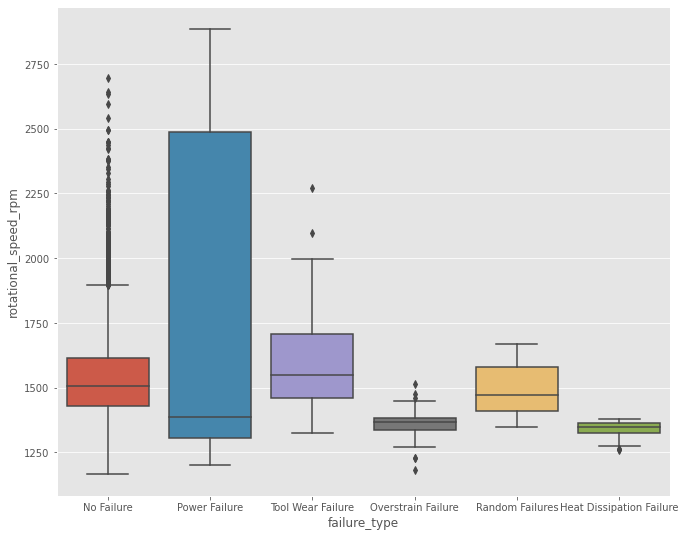

In [ ]:
# Rotação por tipo de falha 
plt.figure(figsize = (11,9))
sns.boxplot(x=df["failure_type"],y=df['rotational_speed_rpm'])

*   O boxplot dos vários tipos de falhas são diferentes quando não falha






## Torque

In [ ]:
df["torque_nm"].describe()

count    6667.000000
mean       40.058512
std         9.950804
min         3.800000
25%        33.200000
50%        40.200000
75%        46.800000
max        76.600000
Name: torque_nm, dtype: float64

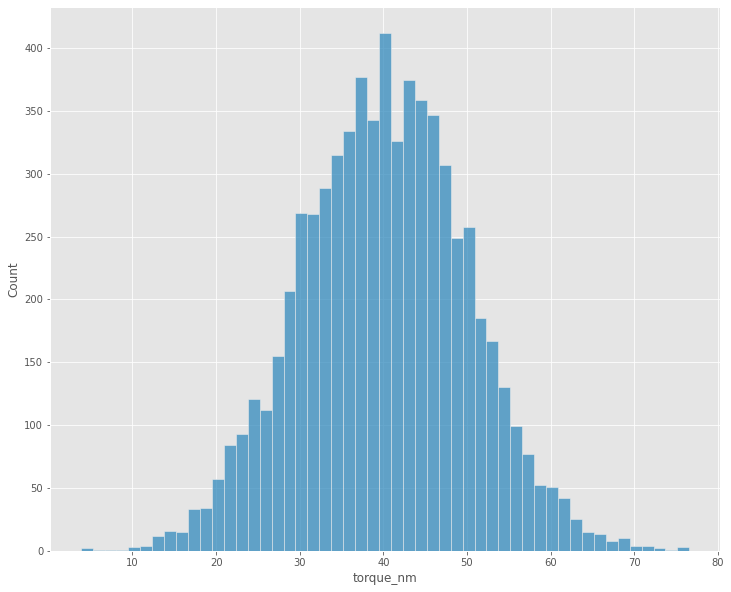

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(x=df["torque_nm"])

*   A média do torque é 40
*   Desvio padrão é 9,95



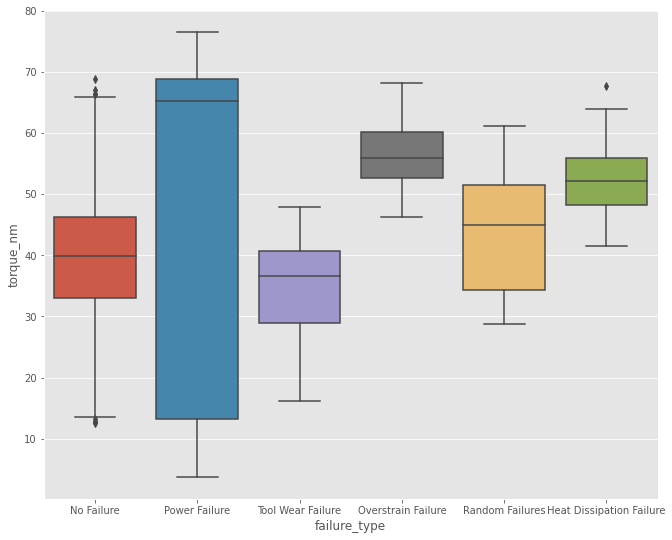

In [ ]:
# Torque por tipo de falha 
plt.figure(figsize = (11,9))
sns.boxplot(x=df["failure_type"],y=df['torque_nm'])

*   O boxplot dos vários tipos de falhas são diferentes quando não falha

## Desgaste das ferramentas em minutos 

In [ ]:
df["tool_wear_min"].describe()

count    6667.000000
mean      108.098095
std        63.359915
min         0.000000
25%        54.000000
50%       108.000000
75%       162.000000
max       251.000000
Name: tool_wear_min, dtype: float64

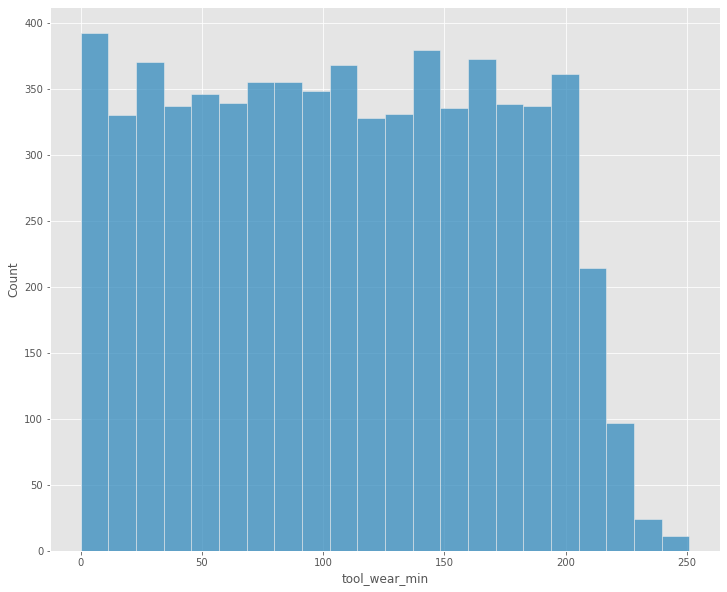

In [ ]:
plt.figure(figsize=(12,10))
sns.histplot(x=df["tool_wear_min"])

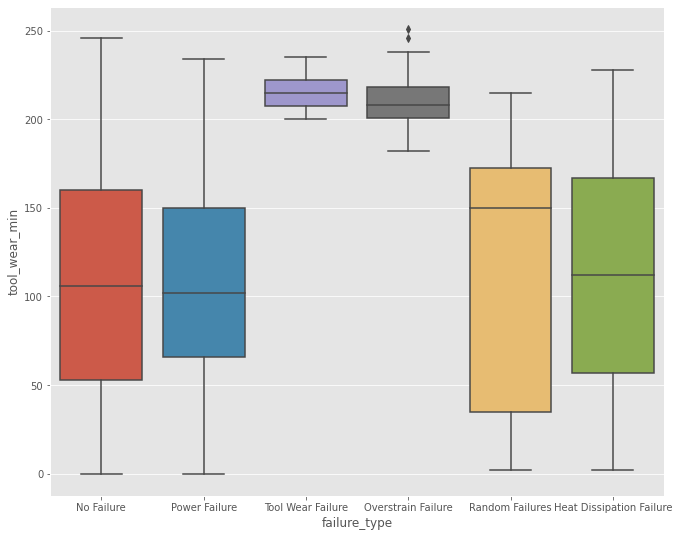

In [ ]:
# Torque  por tipo de falha 
plt.figure(figsize = (11,9))
sns.boxplot(x=df["failure_type"],y=df['tool_wear_min'])

*   O boxplot de falha e falha por energia tem mediana parecidas mas Q1 e Q3 são diferentes. 
*   Falha de sobrecarga e falha por desgaste são bem diferentes do resto
*   Falhas aleatórias e falha na dissipação de calor tem medianas diferntes de não falha

## Correlação das váriaveis 

In [ ]:
dfcorr = df[["type", "air_temperature_k","process_temperature_k","rotational_speed_rpm","torque_nm","tool_wear_min","failure_type"]]

In [ ]:
dfcorr.corr()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
air_temperature_k,1.000000,0.875724,0.035903,-0.023257,0.021078
process_temperature_k,0.875724,1.000000,0.033379,-0.024457,0.020298
rotational_speed_rpm,0.035903,0.033379,1.000000,-0.875989,-0.001290
torque_nm,-0.023257,-0.024457,-0.875989,1.000000,-0.004343
tool_wear_min,0.021078,0.020298,-0.001290,-0.004343,1.000000


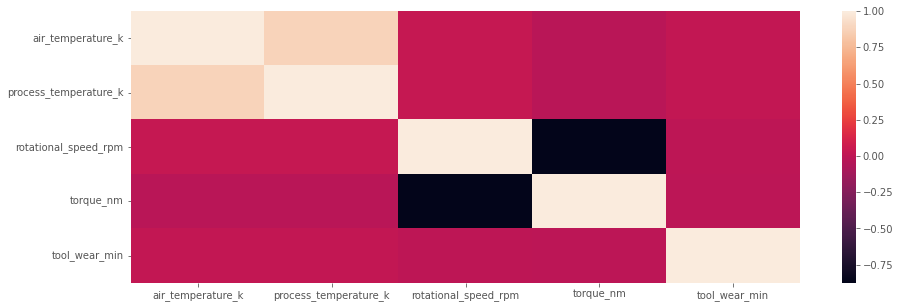

In [ ]:
plt.figure(figsize = (15,5))
ax = sns.heatmap(dfcorr.corr()) 


*   Temperatura ambiente e do processso tem forte correlação positiva 
*   velocidade de rotação e torque tem forte correação negativa


# Considerações finais 


*   As váriaveis mostraram que geram impacto nas falhas das máquinas
*   udi e product_id são identificadores únicos e não foram analisados por esse motivo
*  As temperaturas tem correlação forte, como esperado
*   velocidade de rotação e torque tem forte correação negativa